In [2]:
import os
import numpy as np
import glob
import shutil

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin = url, fname = "flower_photos.tgz",
                                   extract = True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

228813984/228813984 [==============================] - 328s 1us/step


In [4]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

In [9]:
for cl in classes:
    img_path = os.path.join(base_dir, cl)
    images = glob.glob(img_path + '/*.jpg')
    print("{}: {} Images".format(cl, len(images)))
    train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

    for t in train:
        if not os.path.exists(os.path.join(base_dir, 'train', cl)):
            os.makedirs(os.path.join(base_dir, 'train', cl))
        shutil.move(t, os.path.join(base_dir, 'train', cl))

    for v in val:
         if not os.path.exists(os.path.join(base_dir, 'val', cl)):
            os.makedirs(os.path.join(base_dir, 'val', cl))
         shutil.move(v, os.path.join(base_dir, 'val', cl))

roses: 641 Images
daisy: 633 Images
dandelion: 898 Images
sunflowers: 699 Images
tulips: 799 Images


In [10]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [11]:
batch = 100
img_shape = 150

In [12]:
def plotimages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize = (20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [13]:
image_gen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True)

train_data_gen = image_gen.flow_from_directory(batch_size = batch,
                                               directory = train_dir,
                                               target_size = (img_shape, img_shape),
                                               shuffle = True)

Found 2935 images belonging to 5 classes.


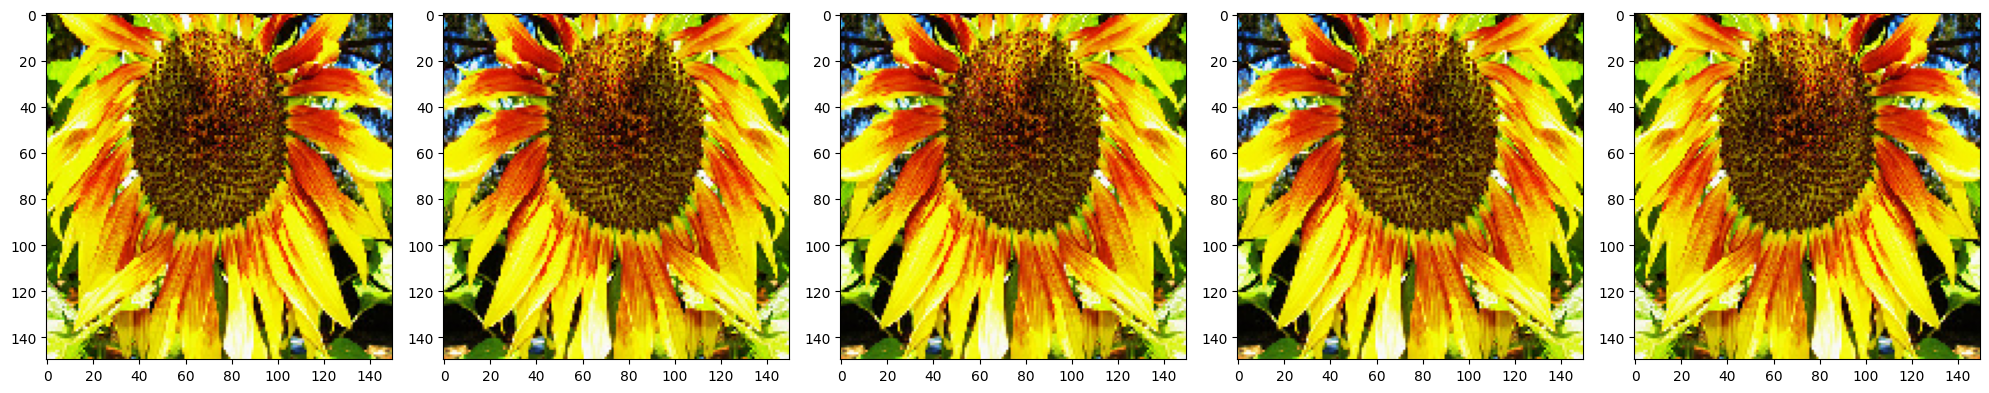

In [14]:
aug_images = [train_data_gen[0][0][0] for i in range(5)]

plotimages(aug_images)

In [15]:
image_gen = ImageDataGenerator(rescale = 1./255, rotation_range = 45)

train_data_gen = image_gen.flow_from_directory(batch_size = batch,
                                               directory = train_dir,
                                               target_size = (img_shape, img_shape),
                                               shuffle = True)

Found 2935 images belonging to 5 classes.


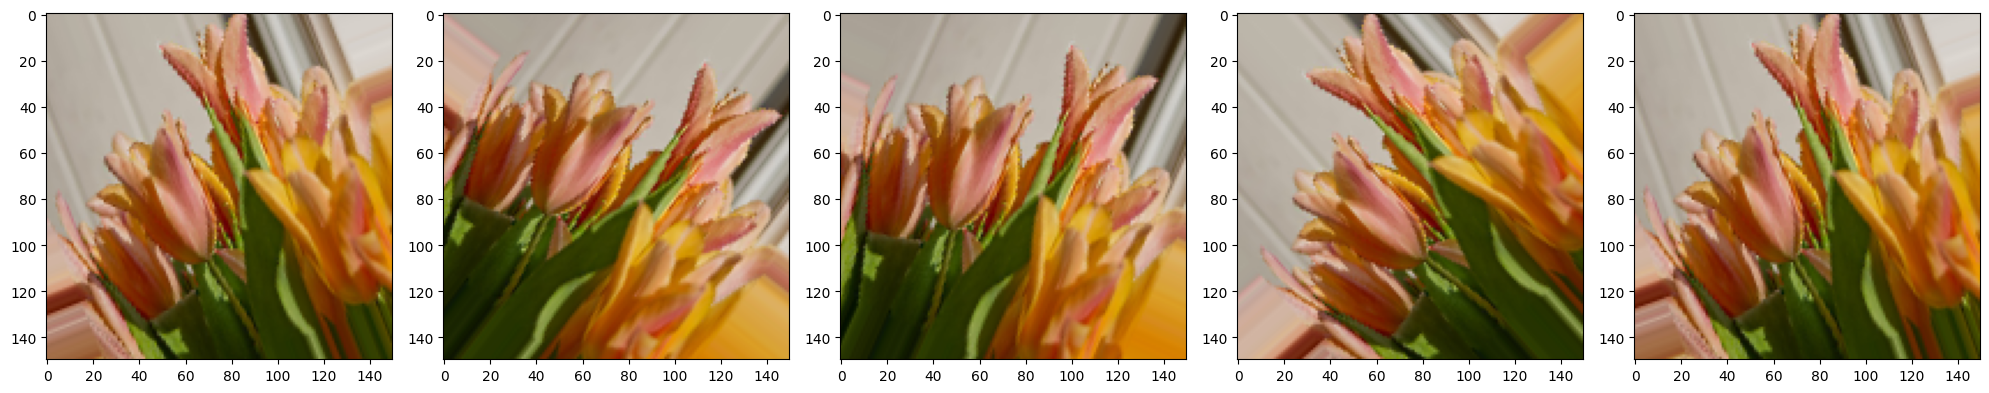

In [16]:
aug_images = [train_data_gen[0][0][0] for i in range(5)]

plotimages(aug_images)

In [18]:
image_gen = ImageDataGenerator(rescale = 1./255, zoom_range = 0.5)

train_data_gen = image_gen.flow_from_directory(batch_size = batch,
                                               directory = train_dir,
                                               target_size = (img_shape, img_shape),
                                               shuffle = True)

Found 2935 images belonging to 5 classes.


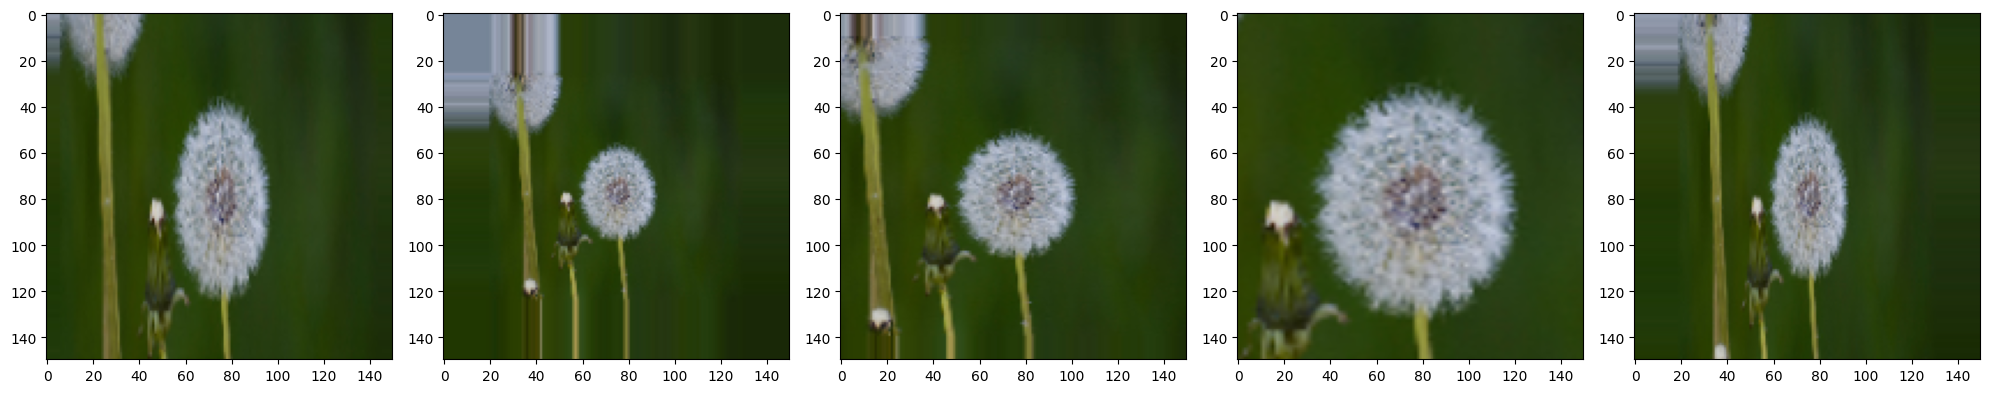

In [19]:
aug_images = [train_data_gen[0][0][0] for i in range(5)]

plotimages(aug_images)

In [21]:
image_gen_train = ImageDataGenerator(rescale = 1./255,
                                     horizontal_flip = True,
                                     rotation_range = 45,
                                     zoom_range = 0.5,
                                     width_shift_range = 0.15,
                                     height_shift_range = 0.15)

train_data_gen = image_gen_train.flow_from_directory(batch_size = batch,
                                                     directory = train_dir,
                                                     target_size = (img_shape, img_shape),
                                                     shuffle = True,
                                                     class_mode = 'sparse')

Found 2935 images belonging to 5 classes.


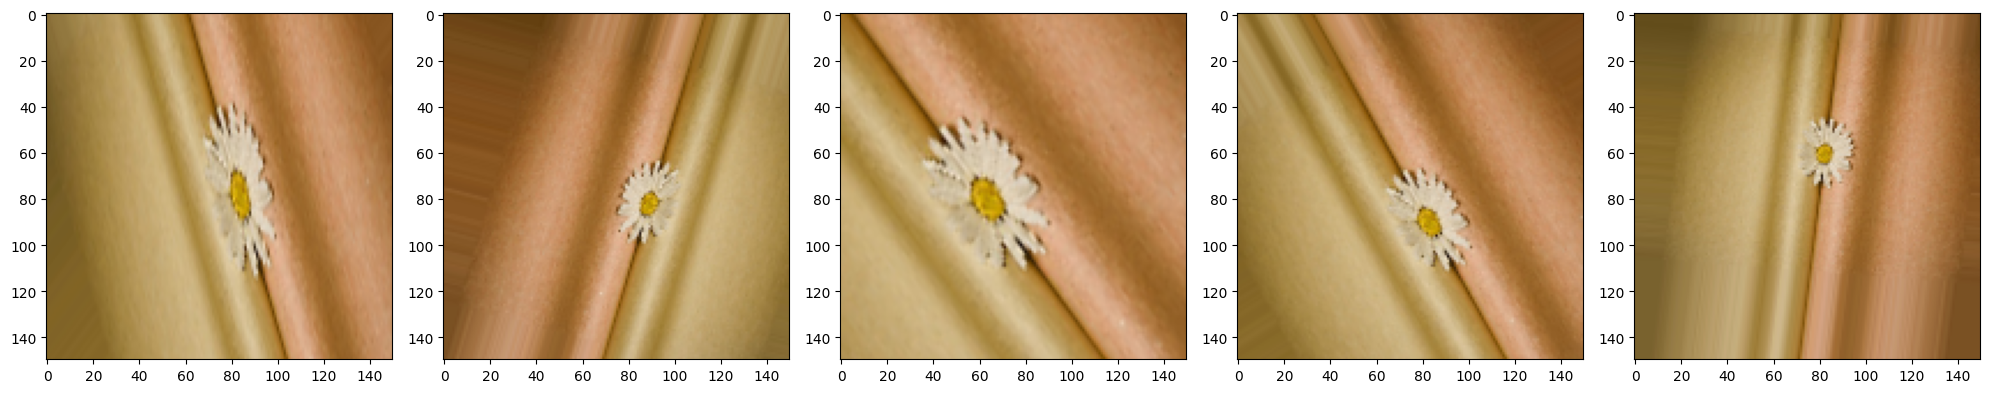

In [22]:
aug_images = [train_data_gen[0][0][0] for i in range(5)]

plotimages(aug_images)

In [23]:
image_data_val = ImageDataGenerator(rescale = 1./255)

val_data_gen = image_data_val.flow_from_directory(batch_size = batch,
                                                  directory = val_dir,
                                                  target_size = (img_shape, img_shape),
                                                  class_mode = 'sparse')

Found 735 images belonging to 5 classes.


In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), input_shape = (150, 150, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(5, activation = 'softmax')
])

In [25]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [26]:
epochs = 80

history = model.fit(
    train_data_gen,
    steps_per_epoch = int(np.ceil(train_data_gen.n / float(batch))),
    epochs = epochs,
    validation_data = val_data_gen,
    validation_steps = int(np.ceil(val_data_gen.n / float(batch)))
)

Epoch 1/80
30/30 [==============================] - 27s 861ms/step - loss: 1.4555 - accuracy: 0.3779 - val_loss: 1.2097 - val_accuracy: 0.5048
Epoch 2/80
30/30 [==============================] - 26s 855ms/step - loss: 1.1158 - accuracy: 0.5376 - val_loss: 1.1590 - val_accuracy: 0.5238
Epoch 3/80
30/30 [==============================] - 25s 846ms/step - loss: 1.0498 - accuracy: 0.5738 - val_loss: 0.9343 - val_accuracy: 0.6313
Epoch 4/80
30/30 [==============================] - 26s 849ms/step - loss: 0.9896 - accuracy: 0.6024 - val_loss: 0.9719 - val_accuracy: 0.6095
Epoch 5/80
30/30 [==============================] - 26s 851ms/step - loss: 0.9424 - accuracy: 0.6221 - val_loss: 0.8532 - val_accuracy: 0.6898
Epoch 6/80
30/30 [==============================] - 25s 844ms/step - loss: 0.9012 - accuracy: 0.6443 - val_loss: 0.8533 - val_accuracy: 0.6816
Epoch 7/80
30/30 [==============================] - 27s 884ms/step - loss: 0.8652 - accuracy: 0.6688 - val_loss: 0.7685 - val_accuracy: 0.7238

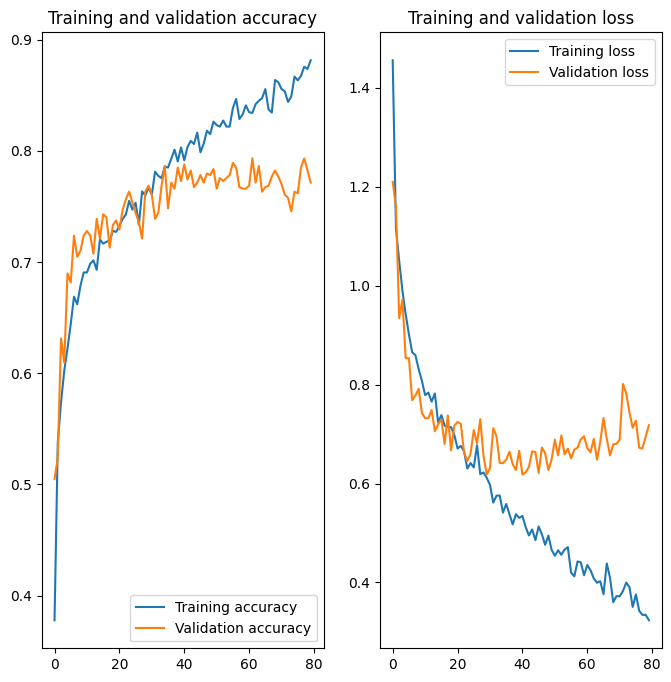

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and validation accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Training loss')
plt.plot(epochs_range, val_loss, label = 'Validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and validation loss')
plt.show()